## Created with the help of a book Titled "Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow"

## Importing data exactly like mentioned in the book

In [2]:
import os
import tarfile
import urllib.request

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [3]:
fetch_housing_data()

In [14]:
import pandas as pd
import numpy as np

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [5]:
df = load_housing_data()
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


### EDA

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [22]:
df[df.isna().any(axis=1)]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
290,-122.16,37.77,47.0,1256.0,NaN,570.0,218.0,4.3750,161900.0,NEAR BAY
341,-122.17,37.75,38.0,992.0,NaN,732.0,259.0,1.6196,85100.0,NEAR BAY
538,-122.28,37.78,29.0,5154.0,NaN,3741.0,1273.0,2.5762,173400.0,NEAR BAY
563,-122.24,37.75,45.0,891.0,NaN,384.0,146.0,4.9489,247100.0,NEAR BAY
696,-122.10,37.69,41.0,746.0,NaN,387.0,161.0,3.9063,178400.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20267,-119.19,34.20,18.0,3620.0,NaN,3171.0,779.0,3.3409,220500.0,NEAR OCEAN
20268,-119.18,34.19,19.0,2393.0,NaN,1938.0,762.0,1.6953,167400.0,NEAR OCEAN
20372,-118.88,34.17,15.0,4260.0,NaN,1701.0,669.0,5.1033,410700.0,<1H OCEAN
20460,-118.75,34.29,17.0,5512.0,NaN,2734.0,814.0,6.6073,258100.0,<1H OCEAN


In [23]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [38]:
%matplotlib inline
import matplotlib.pyplot as plt

array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

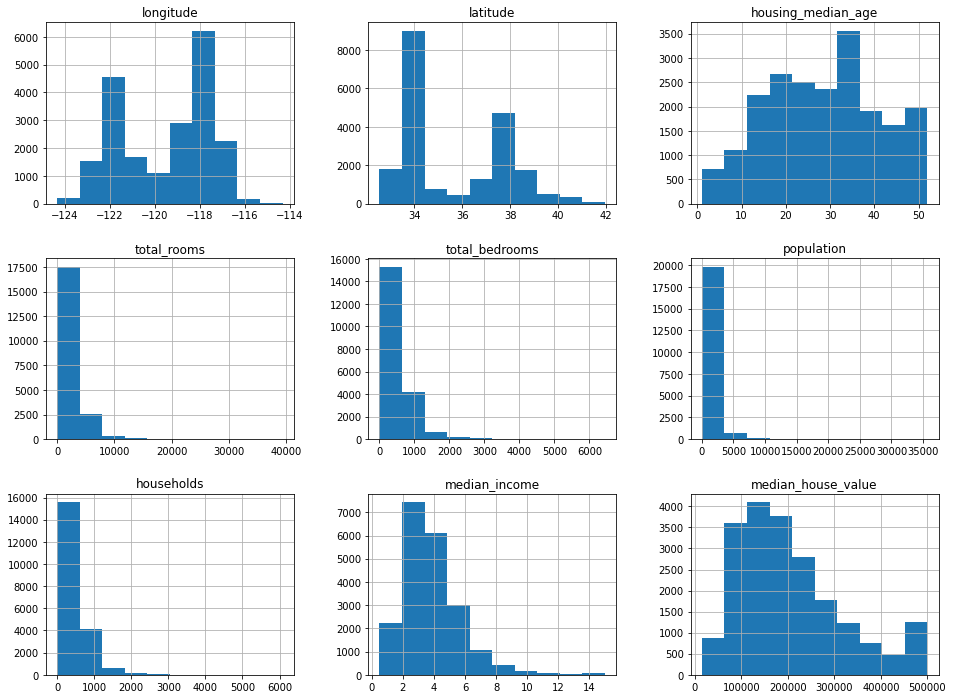

In [39]:
df.hist(figsize=[16, 12])

In [ ]:
df['income_cat'] = pd.cut()

<AxesSubplot:>

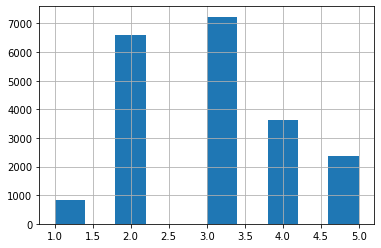

In [84]:
df["income_cat"] = pd.cut(df["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])
df["income_cat"].hist()

In [85]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3


In [86]:
from sklearn.model_selection import StratifiedShuffleSplit

splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in splitter.split(df, df['income_cat']):
    train_df = df.loc[train_index]
    test_df = df.loc[test_index]

In [89]:
train_df['income_cat'].value_counts() / len(train_df)

3    0.350594
2    0.318859
4    0.176296
5    0.114462
1    0.039789
Name: income_cat, dtype: float64

In [90]:
test_df['income_cat'].value_counts() / len(test_df)

3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: income_cat, dtype: float64

In [91]:
train_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,72100.0,INLAND,2
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,279600.0,NEAR OCEAN,5
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,82700.0,INLAND,2
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,112500.0,NEAR OCEAN,2
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,238300.0,<1H OCEAN,3


In [93]:
train_df = train_df.drop('income_cat', axis=1)
test_df = test_df.drop('income_cat', axis=1)

## Visualizing the training set

In [119]:
corr = train_df.corr()
corr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924478,-0.105823,0.048909,0.076686,0.108071,0.063146,-0.019615,-0.047466
latitude,-0.924478,1.000000,0.005737,-0.039245,-0.072550,-0.115290,-0.077765,-0.075146,-0.142673
housing_median_age,-0.105823,0.005737,1.000000,-0.364535,-0.325101,-0.298737,-0.306473,-0.111315,0.114146
total_rooms,0.048909,-0.039245,-0.364535,1.000000,0.929391,0.855103,0.918396,0.200133,0.135140
total_bedrooms,0.076686,-0.072550,-0.325101,0.929391,1.000000,0.876324,0.980167,-0.009643,0.047781
population,0.108071,-0.115290,-0.298737,0.855103,0.876324,1.000000,0.904639,0.002421,-0.026882
households,0.063146,-0.077765,-0.306473,0.918396,0.980167,0.904639,1.000000,0.010869,0.064590
median_income,-0.019615,-0.075146,-0.111315,0.200133,-0.009643,0.002421,0.010869,1.000000,0.687151
median_house_value,-0.047466,-0.142673,0.114146,0.135140,0.047781,-0.026882,0.064590,0.687151,1.000000


<AxesSubplot:>

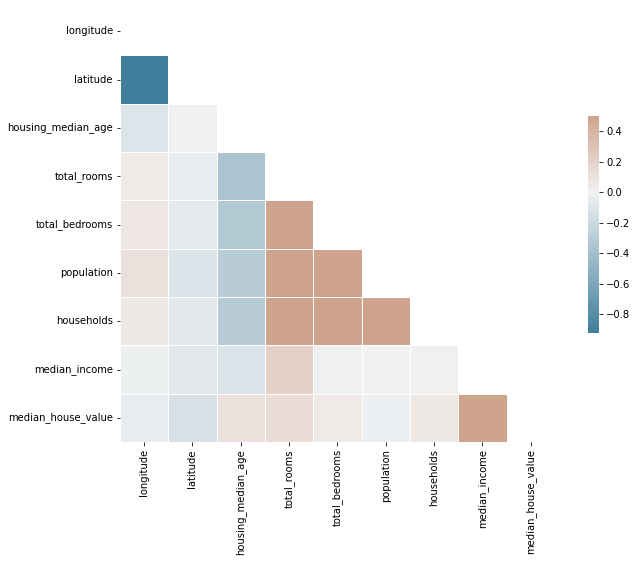

In [118]:
mask = np.triu(np.ones_like(corr, dtype=bool))

fig, ax = plt.subplots(figsize=(12,8))

cmap = sns.diverging_palette(230, 30, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=0.5, center=0,
            square=True, linewidths=0.5, cbar_kws={'shrink': .5})

## Imputing and dealing with na/missing values

In [120]:
X_train = train_df.drop('median_house_value', axis=1).copy()
y_train = train_df['median_house_value']

In [131]:
X_num = X_train.select_dtypes(include=np.number)
X_cat = X_train.select_dtypes(include='object')

In [138]:
na = X_num.loc[X_num.isna().any(axis=1)]
na

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
1606,-122.08,37.88,26.0,2947.0,NaN,825.0,626.0,2.9330
10915,-117.87,33.73,45.0,2264.0,NaN,1970.0,499.0,3.4193
19150,-122.70,38.35,14.0,2313.0,NaN,954.0,397.0,3.7813
4186,-118.23,34.13,48.0,1308.0,NaN,835.0,294.0,4.2891
16885,-122.40,37.58,26.0,3281.0,NaN,1145.0,480.0,6.3580
...,...,...,...,...,...,...,...,...
1350,-121.95,38.03,5.0,5526.0,NaN,3207.0,1012.0,4.0767
4691,-118.37,34.07,50.0,2519.0,NaN,1117.0,516.0,4.3667
9149,-118.50,34.46,17.0,10267.0,NaN,4956.0,1483.0,5.5061
16757,-122.48,37.70,33.0,4492.0,NaN,3477.0,1537.0,3.0546


In [139]:
na['total_bedrooms'].value_counts()

Series([], Name: total_bedrooms, dtype: int64)

In [148]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')

na_imputed = imputer.fit_transform(X_num)
X_num = pd.DataFrame(na_imputed, columns=X_num.columns, index= X_num.index)

In [150]:
na = X_num.loc[X_num.isna().any(axis=1)]
na

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income


## Dealing with categorical values

In [164]:
X_cat.head()

,ocean_proximity
12655,INLAND
15502,NEAR OCEAN
2908,INLAND
14053,NEAR OCEAN
20496,<1H OCEAN


In [169]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False)
X_cat_encoded = encoder.fit_transform(X_cat)

In [170]:
X_cat_encoded

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

## Feature engineering

In [171]:
X_num.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964


In [177]:
def feature_eng(data):
    data['rooms_per_household'] = data['total_rooms'] / data['households']
    data['bedrooms_per_household'] = data['total_bedrooms'] / data['households']
    data['population_per_household'] = data['population'] / data['households']
    return(data)

In [178]:
feature_engineered = feature_eng(X_num)
feature_engineered.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,bedrooms_per_household,population_per_household
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,5.485836,1.128895,3.168555
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,6.927083,1.113281,2.623698
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,5.393333,1.033333,2.223333
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,3.886128,1.074534,1.859213
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,6.096552,1.113793,3.167241


## Scaling the data

In [189]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_df = scaler.fit_transform(feature_engineered)
scaled_df

array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.01739526,
         0.04629766,  0.00622264],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.56925554,
         0.01826884, -0.04081077],
       [ 0.26758118, -0.1259716 ,  1.22045984, ..., -0.01802432,
        -0.12524691, -0.07537122],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ..., -0.5092404 ,
        -0.2477044 , -0.03743619],
       [-1.56080303,  1.2492109 , -1.1653327 , ...,  0.32814891,
         0.09797804, -0.05915604],
       [-1.28105026,  2.02567448, -0.13148926, ...,  0.01407228,
         0.04272245,  0.00657083]])

## Pipeliney function to stack all the steps for data preparation

In [194]:
housing = train_df.drop('median_house_value', axis=1)
housing_labels = train_df['median_house_value'].copy()

In [198]:
def transform_data(data):
    
    if 'median_house_value' in data.columns:
        labels = data['median_house_value']
        data = data.drop('median_house_value', axis=1)
    else:
        labels = None
    
    #feature engineering
    
    engineered = feature_eng(data)
    features = list(engineered.columns)
    
    #imputing
    from sklearn.impute import SimpleImputer
    
    numeric = engineered.select_dtypes(include=[np.number])
    
    imputer = SimpleImputer(strategy='median')
    imputed = imputer.fit_transform(numeric)
    
    #encode
    from sklearn.preprocessing import OneHotEncoder
    
    cat = engineered.select_dtypes(exclude=[np.number])
    
    encoder = OneHotEncoder(sparse=False)
    encoded = encoder.fit_transform(cat)
    
    features = features + encoder.categories_[0].tolist()
    features.remove('ocean_proximity')
    
    #scale numerical data
    from sklearn.preprocessing import StandardScaler
    
    scaler = StandardScaler()
    scaled = scaler.fit_transform(imputed)
    
    #concatenate obtained results
    
    output = np.hstack([scaled, encoded])
    
    return output, labels, features

In [195]:
train_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,72100.0,INLAND
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,279600.0,NEAR OCEAN
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,82700.0,INLAND
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,112500.0,NEAR OCEAN
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,238300.0,<1H OCEAN


## Training models and cross validation

In [199]:
train_data, train_labels, features = transform_data(train_df)

In [203]:
train_data.shape

(16512, 16)

In [210]:
train_data_small = train_data[0:5]
train_data_small.shape

(5, 16)

In [211]:
train_data_actual = train_labels[0:5]
train_data_actual.shape

(5,)

In [213]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

lin_reg.fit(train_data, train_labels)

LinearRegression()

In [214]:
train_data_predicted = lin_reg.predict(train_data_small)

In [216]:
train_data_predicted

array([ 86772.6680092 , 304627.25722837, 152470.2559408 , 185071.07809718,
       245832.74065449])

In [220]:
comparison = pd.DataFrame({'Predicted' : train_data_predicted, 'Actual': train_data_actual})
comparison['difference'] = comparison['Predicted'] - comparison['Actual']
comparison

,Predicted,Actual,difference
12655,86772.668009,72100.0,14672.668009
15502,304627.257228,279600.0,25027.257228
2908,152470.255941,82700.0,69770.255941
14053,185071.078097,112500.0,72571.078097
20496,245832.740654,238300.0,7532.740654


In [223]:
from sklearn.metrics import mean_squared_error

lin_mse = mean_squared_error(train_data_actual, train_data_predicted)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

46974.12684208612

In [261]:
from sklearn.tree import DecisionTreeRegressor

dtree2 = DecisionTreeRegressor(random_state=42)
dtree2.fit(train_data, train_labels)

tree_data_predicted2 = dtree2.predict(train_data_small)



In [263]:
tree_mse2 = mean_squared_error(train_data_actual, tree_data_predicted2)
tree_rmse2 = np.sqrt(tree_mse2)
tree_rmse2

0.0

In [265]:
from sklearn.model_selection import cross_val_score

tree_scores = cross_val_score(dtree2, train_data, train_labels,
                        scoring="neg_mean_squared_error", cv=10)

tree_scores = np.sqrt(-tree_scores)

In [267]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_scores)

Scores: [70798.60165487 70171.26909192 71207.37289676 72350.49404903
 67550.09975136 73685.5141888  76127.81928345 73169.69840581
 71676.83512855 72959.75345369]
Mean: 71969.74579042426
Standard deviation: 2181.8520636359276


In [268]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(train_data, train_labels)

rf_data_predicted = rf_reg.predict(train_data_small)

rf_mse = mean_squared_error(train_data_actual, rf_data_predicted)
rf_rmse = np.sqrt(rf_mse)
rf_rmse

11136.693582930266

In [269]:
rf_mse_scores = cross_val_score(rf_reg, train_data, train_labels,
                        scoring="neg_mean_squared_error", cv=10)

rf_mse_scores = np.sqrt(-rf_mse_scores)


In [270]:
display_scores(rf_mse_scores)

Scores: [51715.35024655 49552.89145449 46758.24474329 51983.50388826
 47823.3554912  51012.27233985 53182.02235144 50087.88762531
 48454.77002477 54678.7802318 ]
Mean: 50524.90783969575
Standard deviation: 2345.30386428754


## Tuning hyperparameters using GridSearch and RandomizedSearch

In [271]:
from sklearn.model_selection import GridSearchCV

#Copypasta from chapter2
param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(train_data, train_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [272]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [273]:
grid_search.best_estimator_

RandomForestRegressor(max_features=6, n_estimators=30, random_state=42)

In [281]:
cvresults = grid_search.cv_results_
for mean_score, params in zip(cvresults['mean_test_score'] ,cvresults['params']):
    print(np.sqrt(-mean_score), params)

65428.14583153853 {'max_features': 2, 'n_estimators': 3}
55646.4620987477 {'max_features': 2, 'n_estimators': 10}
53210.60828716032 {'max_features': 2, 'n_estimators': 30}
60394.68796120273 {'max_features': 4, 'n_estimators': 3}
52872.82775087158 {'max_features': 4, 'n_estimators': 10}
50353.56856880023 {'max_features': 4, 'n_estimators': 30}
57393.772778328406 {'max_features': 6, 'n_estimators': 3}
51460.13081188443 {'max_features': 6, 'n_estimators': 10}
49662.456832295546 {'max_features': 6, 'n_estimators': 30}
58584.73979566483 {'max_features': 8, 'n_estimators': 3}
52212.034624869106 {'max_features': 8, 'n_estimators': 10}
49881.373221202426 {'max_features': 8, 'n_estimators': 30}
62816.81854066542 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
53957.552456988655 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
58462.29452127854 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
51772.695561621906 {'bootstrap': False, 'max_features': 3, 'n_estimators

In [282]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,param_bootstrap,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.058445,0.006753,0.000000,0.000000,2,3,NaN,"{'max_features': 2, 'n_estimators': 3}",-4.392382e+09,-4.088726e+09,...,-4.280842e+09,1.530336e+08,18,-1.143247e+09,-1.209732e+09,-1.157476e+09,-1.127269e+09,-1.152289e+09,-1.158003e+09,2.782508e+07
1,0.181047,0.007719,0.006249,0.007654,2,10,NaN,"{'max_features': 2, 'n_estimators': 10}",-3.067820e+09,-3.018499e+09,...,-3.096529e+09,5.059262e+07,11,-5.719223e+08,-6.133600e+08,-5.956251e+08,-5.737339e+08,-5.929462e+08,-5.895175e+08,1.533777e+07
2,0.551792,0.010079,0.026665,0.006184,2,30,NaN,"{'max_features': 2, 'n_estimators': 30}",-2.838884e+09,-2.686164e+09,...,-2.831369e+09,9.497820e+07,9,-4.403756e+08,-4.411695e+08,-4.412972e+08,-4.306553e+08,-4.388198e+08,-4.384635e+08,4.002577e+06
3,0.111574,0.009390,0.003205,0.003926,4,3,NaN,"{'max_features': 4, 'n_estimators': 3}",-3.654100e+09,-3.520062e+09,...,-3.647518e+09,9.915102e+07,16,-9.730052e+08,-1.086796e+09,-1.004363e+09,-1.000755e+09,-1.005037e+09,-1.013991e+09,3.828422e+07
4,0.339281,0.016330,0.008004,0.005057,4,10,NaN,"{'max_features': 4, 'n_estimators': 10}",-2.738651e+09,-2.652197e+09,...,-2.795536e+09,1.065295e+08,8,-5.075180e+08,-5.516308e+08,-5.319843e+08,-5.291784e+08,-5.320427e+08,-5.304708e+08,1.400719e+07
5,0.910253,0.050652,0.028993,0.010908,4,30,NaN,"{'max_features': 4, 'n_estimators': 30}",-2.536012e+09,-2.414162e+09,...,-2.535482e+09,9.618930e+07,3,-3.827943e+08,-4.046929e+08,-3.887801e+08,-3.923942e+08,-3.947148e+08,-3.926753e+08,7.231439e+06
6,0.119911,0.008762,0.003191,0.003908,6,3,NaN,"{'max_features': 6, 'n_estimators': 3}",-3.404429e+09,-3.265852e+09,...,-3.294045e+09,1.031004e+08,12,-8.845737e+08,-9.346951e+08,-9.264949e+08,-9.133094e+08,-8.731519e+08,-9.064450e+08,2.380745e+07
7,0.411538,0.020540,0.007921,0.004939,6,10,NaN,"{'max_features': 6, 'n_estimators': 10}",-2.644253e+09,-2.585298e+09,...,-2.648145e+09,9.479821e+07,4,-4.985158e+08,-5.203141e+08,-4.961454e+08,-5.019818e+08,-4.980372e+08,-5.029989e+08,8.860458e+06
8,1.231638,0.061552,0.021872,0.007653,6,30,NaN,"{'max_features': 6, 'n_estimators': 30}",-2.429993e+09,-2.434375e+09,...,-2.466360e+09,5.243087e+07,1,-3.745899e+08,-3.852382e+08,-3.822599e+08,-3.724220e+08,-3.719572e+08,-3.772934e+08,5.427733e+06
9,0.163725,0.026801,0.004727,0.006269,8,3,NaN,"{'max_features': 8, 'n_estimators': 3}",-3.332912e+09,-3.281843e+09,...,-3.432172e+09,1.231568e+08,14,-8.772668e+08,-9.476862e+08,-9.532671e+08,-9.316608e+08,-8.712794e+08,-9.162320e+08,3.503725e+07


In [284]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(train_data, train_labels)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002A25338B4E0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002A25338BB00>},
                   random_state=42, scoring='neg_mean_squared_error')

In [285]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

48899.99391623358 {'max_features': 7, 'n_estimators': 180}
51692.97945729302 {'max_features': 5, 'n_estimators': 15}
50529.75671838392 {'max_features': 3, 'n_estimators': 72}
50799.097757757736 {'max_features': 5, 'n_estimators': 21}
48963.46518164643 {'max_features': 7, 'n_estimators': 122}
50551.788252364706 {'max_features': 3, 'n_estimators': 75}
50345.33290507883 {'max_features': 3, 'n_estimators': 88}
49316.82201434592 {'max_features': 5, 'n_estimators': 100}
50135.51686035488 {'max_features': 3, 'n_estimators': 150}
64387.376442088294 {'max_features': 5, 'n_estimators': 2}


In [287]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([8.64416369e-02, 7.49997463e-02, 4.03634906e-02, 1.93443452e-02,
       1.71053382e-02, 1.81424851e-02, 1.57398261e-02, 3.45679116e-01,
       7.48578475e-02, 2.50646775e-02, 1.05629420e-01, 1.87591842e-02,
       1.48503144e-01, 5.67829079e-05, 3.71626707e-03, 5.59669220e-03])

In [288]:
for feature, importance in zip(features, feature_importances):
    print(f'{feature}: {importance}')

longitude: 0.08644163688909212
latitude: 0.07499974628843278
housing_median_age: 0.040363490622875295
total_rooms: 0.019344345212524688
total_bedrooms: 0.017105338158353953
population: 0.018142485053593546
households: 0.015739826082785874
median_income: 0.34567911613978625
rooms_per_household: 0.074857847526654
bedrooms_per_household: 0.025064677545352087
population_per_household: 0.10562942043454092
<1H OCEAN: 0.01875918421985748
INLAND: 0.14850314365527348
ISLAND: 5.6782907884062714e-05
NEAR BAY: 0.003716267067294388
NEAR OCEAN: 0.005596692195699063


In [292]:
importance_list = list(zip(features, feature_importances.tolist()))
importance_list

[('longitude', 0.08644163688909212),
 ('latitude', 0.07499974628843278),
 ('housing_median_age', 0.040363490622875295),
 ('total_rooms', 0.019344345212524688),
 ('total_bedrooms', 0.017105338158353953),
 ('population', 0.018142485053593546),
 ('households', 0.015739826082785874),
 ('median_income', 0.34567911613978625),
 ('rooms_per_household', 0.074857847526654),
 ('bedrooms_per_household', 0.025064677545352087),
 ('population_per_household', 0.10562942043454092),
 ('<1H OCEAN', 0.01875918421985748),
 ('INLAND', 0.14850314365527348),
 ('ISLAND', 5.6782907884062714e-05),
 ('NEAR BAY', 0.003716267067294388),
 ('NEAR OCEAN', 0.005596692195699063)]

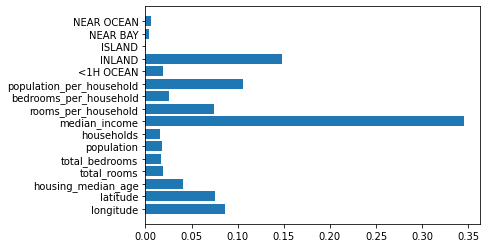

In [296]:
plt.barh(y=features, width=feature_importances.tolist())
plt.show()

## Evaluate the test set using best perfoming model

In [338]:
final_model = grid_search.best_estimator_

final_test = test_df.copy()

final_test_transformed, final_test_labels, final_test_features = transform_data(final_test)

final_test_transformed.shape

(4128, 16)

In [339]:
final_predictions = final_model.predict(final_test_transformed)
final_mse = mean_squared_error(final_test_labels, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

63435.791108914054

#### Test set RMSE = 63435.791108914054